# Importing the required modules

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

The data that we are working with is made up of 8x8 images of digits. 

In [2]:
from sklearn.datasets import load_digits  #we're importing the hand-written digits dataset from sklearn
digits = load_digits() 
X = digits.data 
y = digits.target 

# Printing the array-representation of the first number and finding the shape of our Data

In [3]:
print (digits.data[0].reshape(8,8)) 

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

So we see that our array X has 1797 rows and 64 columns. That is we can say that it has 64 features. 

# Standardizing the Data

We standardize the data in order to convert it into a Standard Normal Distribution with mean = 0 and standard deivation = 1.

In [6]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
print(X)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


# Finding out the Covariance Matrix 

Covariance matrix provides the measure of how the features are related to each other. 

If we have a matrix X of m*n dimension such that it holds n data points of m dimensions

Covariance is calculated from the formula :- (1/(n-1))(X-X_mean)(X-X_mean)_Transpose

Covariance Matrix has the following features -

1.Variance of dimensions as the main diagonal elements.

2.Covariance of dimensions as the off diagonal elements.

3.If two elements have positive covariance then that means if one of the element increses or decreases the other does the same and negetive covariance means if one of the element increses or decreases the other does the opposite of it.

In [7]:
X_cov = (X.T @ X) / (X.shape[0] - 1) #here we are taking our mean as 0 
print(X_cov)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]


# Visualising the Covariance Matrix

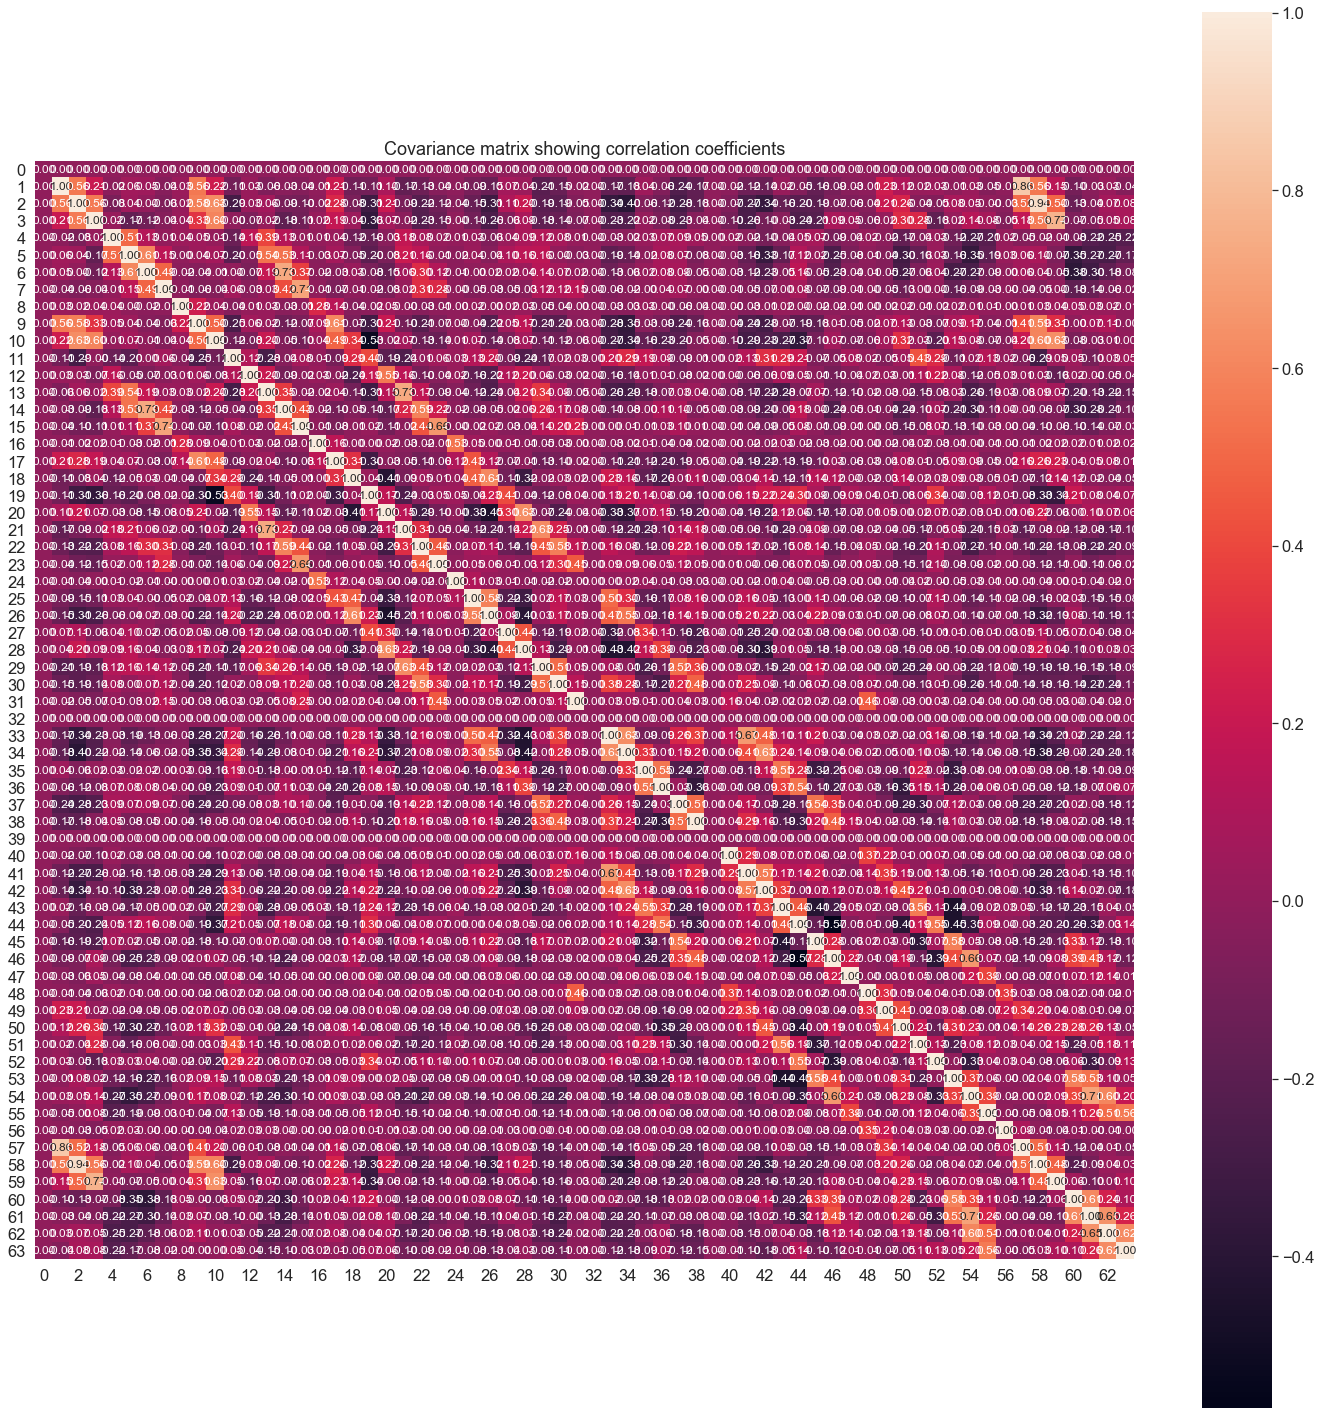

In [8]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(X_cov,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12})
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

# Finding the Eigen Vectors and Eigen Values of my Covariance Matrix X_cov

We do this beacuse:-

From Linear Algebra, let's say a matrix named X is linearly transformed to a matrix named Y using a linear transformation P

i.e. Y = PX

If X has a covariance matrix of S = 1/(n-1)XX_transpose

Then same way, Y will have a Covariance Matrix of S_y = 1/(n-1)YY_Transpose 

or we can write it as :-

S_y =  1/(n-1)YY_Transpose 

= 1/(n-1)PX(PX)_Transpose  [ Y = PX ]

= 1/(n-1)PXX_TransposeP_Transpose

= 1/(n-1)P(XX_Transpose)P_Transpose

S_y = PSP_transpose

We need to diagonalise this S_y so that the transformed matrix Y has a lower dimension with all the original data points projected along the principal components. The diagonal elements should have the maximised variances of the transformed data points and the off diagonal elements should have 0 covariance that is the data points should not be related to each other.

In [9]:
P_values, P = np.linalg.eig(X_cov)

For this, we do eigendecomposition:-

If P is my eigen vector of S or the covariance matrix of X then from linear algebra PSP_transpose is a diagonal matrix with it's diagonal elements being the eigen values or P_values

The eigen vector P will give me the direction along which the transformation of my dataset X took place. The eigen values will 
give me the magnitude of the transformations.

This diagonal matrix will have the eigen values which will represent how spread out my features are.

(This is the reason as to why we had found out the covariance matrix of our original dataset X in the first place)

Here we are diagonalising the matrix because our target dataset or transformed dataset should have it's covariance matrix as a digonal matrix with the diagonal elements being the maximised variances of the transformed data. 

# PLOTTING THE CUMULATIVE SUM OF THE EXPLAINED VARIANCE

The cumulative explained variance which is found out from the eigen values gives me the information about how much variance does my features retain.

In [10]:
idx = np.argsort(P_values, axis=0)[::-1]

([<matplotlib.axis.XTick at 0x1dcc4f0e888>,
 <a list of 64 Text xticklabel objects>)

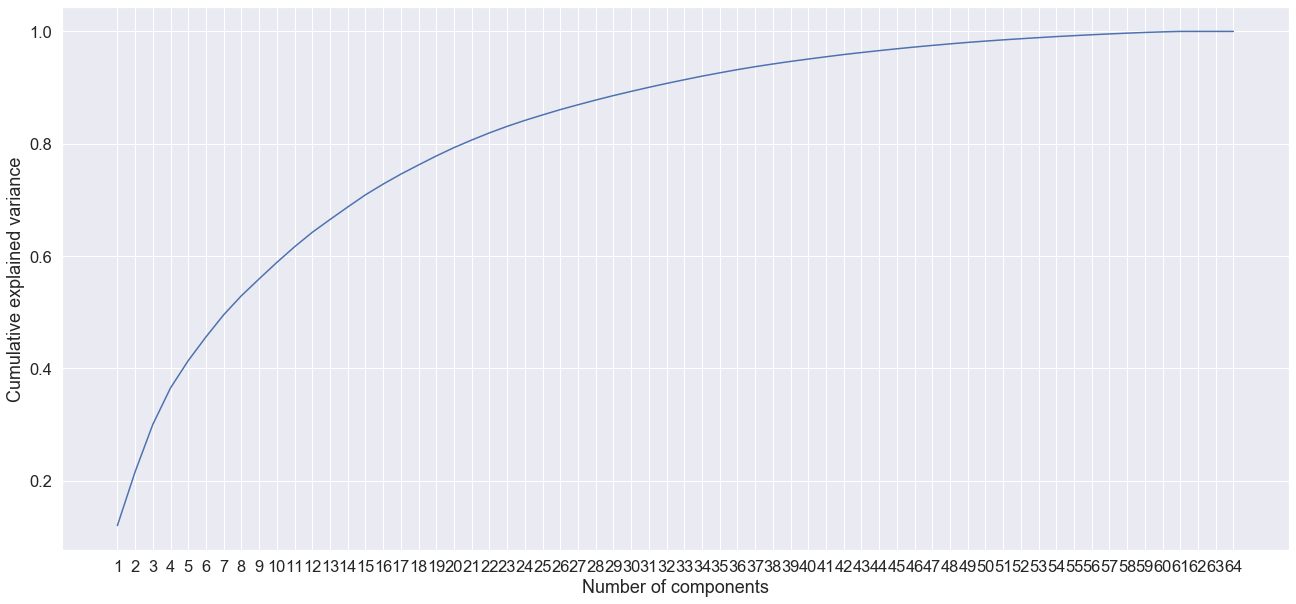

In [11]:
cumsum = np.cumsum(P_values[idx]) / np.sum(P_values[idx])
plt.figure(figsize=(22,10))
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)

# We are finding out the features whose cumulative explained variances are greater than 0.95

In [12]:
c=0
for i in range(1,64):
    if cumsum[i]>0.95:
        c+=1
        print (i, cumsum[i])

39 0.9507791125066463
40 0.9548396432064367
41 0.9588104912891949
42 0.9623754243206211
43 0.965783296135324
44 0.9690616494882035
45 0.9721719695616571
46 0.9750577225027464
47 0.9778226151379817
48 0.9804143645467964
49 0.9827591946021529
50 0.9849417631792728
51 0.9869777395245266
52 0.9889328637847248
53 0.9907660487766966
54 0.9924455126516524
55 0.9940578732742197
56 0.9955355002152806
57 0.9968866843286515
58 0.9981376917536245
59 0.9991746490551817
60 0.9999999999999998
61 0.9999999999999998
62 0.9999999999999998
63 0.9999999999999998


In [13]:
print("The total number of components whose cumulative explained variance is greater than 95%:" , c)

The total number of components whose cumulative explained variance is greater than 95%: 25


Therefore, we need to consider the eigen vectors corresponding to the last 25 features along whose direction, the data points need to be transformed.

# Reducing our original dataset into a 25 dimensional one by applying PCA

Here we are doing PCA by applying linear transformation to our original dataset along the eigen vectors that is along P so that the covariance matrix of X_pca or our transformed dataset is a digonal matrix with the diagonal elements being the maximised variances of the transformed data.  

In [14]:
X_pca = X.dot(P[:,0:25])

# Comparing the shape of our original data and our new data

In [15]:
print("Original shape:   ", X.shape)
print("Transformed shape: ", X_pca.shape)

Original shape:    (1797, 64)
Transformed shape:  (1797, 25)


In [16]:
X_pca

array([[-1.91421366,  0.95450157, -3.94603482, ...,  0.50882594,
        -0.75889619,  0.46450005],
       [-0.58898033, -0.9246358 ,  3.92475494, ..., -0.47847178,
         0.49115825, -0.79050446],
       [-1.30203906,  0.31718883,  3.02333293, ..., -1.27614192,
        -0.38943705,  0.40757998],
       ...,
       [-1.02259599,  0.14791087,  2.46997365, ...,  0.04154929,
         0.23518061,  0.26148459],
       [-1.07605522,  0.38090625, -2.45548693, ...,  1.11166227,
         0.31241134,  0.9401588 ],
       [ 1.25770233,  2.22759088,  0.28362789, ..., -1.0733413 ,
        -0.27470008,  0.9092777 ]])

This is our reduced dataset consisting of data points projected along the first 25 principal components. 

# Splitting the data into Training Set and Test Set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.35)

In [18]:
X_train.shape

(1168, 25)

In [19]:
y_train.shape

(1168,)

In [20]:
X_test.shape

(629, 25)

In [21]:
y_test.shape

(629,)

# Building the Neural Networks for the classfication

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)

# Training the Data

In [23]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 2.26255680
Iteration 2, loss = 2.07493260
Iteration 3, loss = 1.85130177
Iteration 4, loss = 1.59834900
Iteration 5, loss = 1.36329400
Iteration 6, loss = 1.15811805
Iteration 7, loss = 0.99207784
Iteration 8, loss = 0.85677316
Iteration 9, loss = 0.74988294
Iteration 10, loss = 0.66314125
Iteration 11, loss = 0.59473810
Iteration 12, loss = 0.53712812
Iteration 13, loss = 0.49056734
Iteration 14, loss = 0.45212318
Iteration 15, loss = 0.41981819
Iteration 16, loss = 0.39243652
Iteration 17, loss = 0.36850564
Iteration 18, loss = 0.34763706
Iteration 19, loss = 0.32946564
Iteration 20, loss = 0.31382253
Iteration 21, loss = 0.29991196
Iteration 22, loss = 0.28722122
Iteration 23, loss = 0.27633714
Iteration 24, loss = 0.26626830
Iteration 25, loss = 0.25675961
Iteration 26, loss = 0.24848650
Iteration 27, loss = 0.24009963
Iteration 28, loss = 0.23274485
Iteration 29, loss = 0.22571743
Iteration 30, loss = 0.21917501
Iteration 31, loss = 0.21325093
Iteration 32, los

C:\Users\INDIRA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

# Running predictions on the Test Set

In [24]:
y_pred = mlp.predict(X_test)
y_pred

array([5, 6, 3, 0, 6, 2, 8, 3, 8, 8, 7, 4, 5, 8, 8, 9, 1, 0, 4, 5, 7, 0,
       7, 1, 6, 2, 7, 7, 2, 9, 2, 0, 3, 3, 3, 9, 3, 4, 3, 8, 8, 0, 7, 6,
       2, 6, 6, 2, 5, 8, 5, 8, 0, 8, 5, 9, 0, 0, 2, 1, 4, 4, 3, 8, 2, 5,
       5, 3, 5, 0, 4, 9, 6, 4, 8, 5, 0, 2, 7, 4, 9, 2, 3, 8, 6, 2, 4, 2,
       0, 4, 0, 7, 5, 7, 2, 6, 5, 4, 8, 1, 1, 1, 7, 7, 1, 7, 1, 0, 5, 3,
       4, 8, 4, 3, 8, 5, 0, 1, 6, 3, 6, 1, 9, 3, 6, 5, 5, 6, 6, 1, 8, 9,
       2, 2, 1, 7, 4, 7, 1, 1, 4, 6, 5, 6, 0, 3, 0, 0, 7, 1, 8, 7, 6, 5,
       5, 6, 2, 3, 6, 0, 9, 8, 6, 5, 6, 8, 2, 5, 2, 8, 7, 4, 4, 6, 4, 9,
       8, 4, 7, 3, 7, 1, 6, 7, 4, 8, 0, 7, 9, 4, 3, 1, 1, 4, 3, 3, 5, 5,
       7, 3, 5, 1, 5, 6, 6, 0, 3, 5, 7, 4, 1, 5, 3, 0, 8, 1, 7, 9, 2, 8,
       5, 4, 6, 5, 2, 9, 9, 0, 3, 1, 9, 3, 3, 7, 9, 9, 8, 3, 1, 4, 9, 0,
       0, 6, 6, 5, 2, 4, 8, 3, 7, 0, 0, 7, 3, 5, 9, 9, 0, 9, 0, 2, 7, 2,
       1, 9, 5, 4, 9, 9, 5, 1, 1, 9, 5, 6, 5, 8, 4, 0, 9, 1, 8, 2, 6, 0,
       8, 5, 4, 3, 8, 1, 3, 6, 6, 6, 3, 0, 2, 9, 2,

# Calculating the Accuracy

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("\nAccuracy in percentage:")
print(accuracy_score(y_test, y_pred)*100)

Accuracy:
0.9618441971383148

Accuracy in percentage:
96.18441971383149


# Plotting the Confusion Matrix 

Confusion Matrix


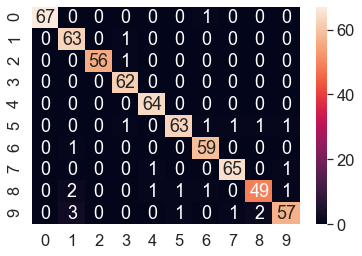

In [26]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
class_name = digits.target_names
cf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(cf_matrix, annot=True, xticklabels = class_name, yticklabels=class_name)